## Implementación de condiciones de borde no homogéneas - Método SOR

MOOC: Transferencia de Calor y Masa Computacional

Módulo 5 - Clase 4

Autora: Catalina Pino Muñoz 

Editor: Felipe Huerta

Hola a todos y todas. 

En esta clase, implementaremos el método sobra-relajación sucesiva (SOR) en Python para resolver un problema a los valores de contorno lineal en dos dimensiones con condiciones de borde no uniformes en el espacio.

Primero describiremos el sistema físico de interés y plantearemos el sistema de ecuaciones diferenciales parciales y sus condiciones borde.

Luego, discretizaremos el sistema de ecuaciones y obtendremos la solución de este problema matemático por medio del método SOR. 

Finalmente graficaremos el perfil en el espacio para nuestra variable de interés.

### 1. Descripción del sistema físico - Difusión en dos dimensiones 

La figuras muestran un receptáculo cuadrado en el cual difunde una especie A en una mezcla binaria (A + B). 
En el receptáculo existe una placa solida delgada que contiene un aromatizante (especie A) en el borde inferior. El receptáculo tiene ancho $L_x$ y alto $L_y$. Estudiaremos tres casos:
     
- Caso 1. Inicialmente la placa aromática tiene ancho $L_x$.
- Caso 2. Luego de un tiempo en el que la placa aromática es consumida solo alcanza un ancho $L_x/3$. 
- Caso 3. La tapa del receptáculo (borde superior) esta semi abierta para permitir la entrada de un flujo constante de aroma hacia dentro del receptáculo.  

Otros supuestos y consideraciones del problema son:

- Mezcla binaria de A y B, donde B es un inerte que no reacciona.
- Existe equilibrio solido-gas entre la placa sólida de aromatizante y la concentración de aroma ($c_A^\star$) en el medio gaseoso en contacto con la placa. 
- Las paredes del receptáculo son impermeables.
- Consideramos un termino de fuente negativo (consumo) de aroma, el cual es homogéneo en el interior del dominio cuadrado, $R_A = -Sc_A$.

#### Conservación de masa - Perfil de concentración en estado estacionario
La ecuación diferencial parcial (EDP) que describe el perfil especial de concentración de la especie A en dos dimensiones y en estado estacionario sujeto a una termino de fuente negativo homogéneo es:

$$D_{AB}\left(\frac{\partial^2 c_A}{\partial x^2} + \frac{\partial^2 c_A}{\partial y^2}\right) = S c_A$$

Sujeto a cuatro condiciones de borde (CB), una en cada pared del receptáculo, para cada caso.

<img src="./Fig_cases.png" alt="Alternative text" 
     align="center"
     width="1000"/>

#### Resumen de condiciones de borde

- Caso 1. Placa aromática de ancho $L_x$ en borde inferior

CB1: borde inferior, $ c_A|_{x,y=0} = c_A^\star $ 

CB2: borde derecho, $\frac{\partial c_A}{d x}|_{x=L,y} = 0$

CB3: borde superior, $\frac{\partial c_A}{d y}|_{x,y=L} = 0$

CB4: borde izquierdo, $\frac{\partial c_A}{d x}|_{x=0,y} = 0$

- Caso 2. Placa aromática de ancho $L_x/3$ en el borde inferior. 

CB1: borde inferior, $ c_A|_{0\leq x\leq L_x/3,y=0} = c_A^\star \quad$ and $\quad\frac{\partial c_A}{d y}|_{L_x/3<x\leq L_x,y=0} = 0$

CB2: borde derecho, $\frac{\partial c_A}{d x}|_{x=L,y} = 0$

CB3: borde superior, $\frac{\partial c_A}{d y}|_{x,y=L} = 0$

CB4: borde izquierdo, $\frac{\partial c_A}{d x}|_{x=0,y} = 0$

- Caso 3. Placa aromática de ancho $L_x/3$ en el borde inferior y flujo entrante constate en borde superior ($2L_x/3<x\leq L_x$).

CB1: borde inferior, $ c_A|_{0\leq x\leq L_x/3,y=0} = c_A^\star \quad$ and $\quad\frac{\partial c_A}{d y}|_{L_x/3<x\leq L_x,y=0} = 0$

CB2: borde derecho, $\frac{\partial c_A}{d x}|_{x=L,y} = 0$

CB3: borde superior, $\frac{\partial c_A}{d y}|_{0\leq x\leq 2 L_x/3,y=L} = 0 \quad$ and $\quad-D_{AB}\frac{\partial c_A}{d y}|_{2 L_x/3 < x\leq L_x,y=L} = -F^\star $

CB4: borde izquierdo, $\frac{\partial c_A}{d x}|_{x=0,y} = 0$

Esta EDP junto a sus condiciones de borde en cada caso constituye un problema matemático lineal, que tiene solución analítica, pero la cual es difícil de obtener. Por lo tanto requerimos de métodos numéricos para encontrar la solución del perfil de concentration en dos dimensiones. 

### 2. Método SOR

Para la resolución del problema uitlizaremos el método SOR

$$a_{ij} c_{i+1,j}^\textrm{correcto} + b_{ij} c_{i-1,j}^\textrm{correcto} + c_{ij} c_{i,j+1}^\textrm{correcto} + d_{ij} c_{i,j-1}^\textrm{correcto} + e_{ij} c_{i,j}^\textrm{correcto} - f_{ij} = 0$$

$$a_{ij} c_{i+1,j}^\textrm{estimado} + b_{ij} c_{i-1,j}^\textrm{estimado} + c_{ij} c_{i,j+1}^\textrm{estimado} + d_{ij} c_{i,j-1}^\textrm{estimado} + e_{ij} c_{i,j}^\textrm{estimado} - f_{ij} = \xi_{i,j}$$

$$c_{i,j}^\textrm{correcto} \approx c_{i,j}^\textrm{estimado} -\frac{\xi_{i,j}}{e_{i,j}}$$

$$c_{i,j}^\textrm{nuevo} \approx c_{i,j}^\textrm{antiguo} -\omega\frac{\xi_{i,j}}{e_{i,j}}$$

Coeficientes SOR para nodos interiores del problema de difusión 2-D en un dominio cuadrado. 
$$a_{ij} = b_{ij} =  \frac{D_{AB}}{\Delta x^2} $$

$$c_{ij} = d_{ij} =  \frac{D_{AB}}{\Delta y^2} $$

$$e_{ij} = -\frac{2D_{AB}}{\Delta x^2} -\frac{2D_{AB}}{\Delta y^2} -S$$

$$ f_{ij} = 0 $$

#### Importar módulos

In [40]:
# Mejorar calidad de gráficos en Jupyter Notebook
%matplotlib notebook

# Visualización de datos y gráficos
import matplotlib.pyplot as plt 

# Computación numérica
import numpy as np

#### Inicializar los parámetros constantes del problema

In [41]:
# Parámetros constantes conocidos

# Ancho del receptáculo / m
Lr = 2.5

# Alto del receptáculo / m
Lz = 2.0

# Difusividad de especie A / m^2 s^-1
D = 2.1e-9

# constante de consumo homogénea / s^-1
k = 2e-9

# Concentración inicial de aroma (A) / mol m^-3
c0 = 0.0

#### 2.1: Generar grilla con los puntos en especifico en la coordenada $x$ e $y$

Definimos dos vector en el espacio que define nuestra malla bidimensional en las coordenadas $x$ e $y$.

In [42]:
# Grilla estructurada en coordenadas x e y para representar receptáculo cuadrado

# Definimos el número de puntos deseados en nuestra grilla
Nr = 101
Nz = Nr

# Definimos vectores con las coordenadas de cada punto en el espacio donde se evaluará la solución.
r_grilla = np.linspace(0.0, Lr, Nr)
z_grilla = np.linspace(0.0, Lz, Nz)

# Calculamos el paso en espacio en cada coordenada.
dr = Lr/(Nr-1)
dz = Lz/(Nz-1)

print("dr = %.3f m, dz = %.3f m" % (dr, dz))
print(r_grilla)

dr = 0.025 m, dz = 0.020 m
[0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.    1.025 1.05  1.075 1.1   1.125 1.15  1.175
 1.2   1.225 1.25  1.275 1.3   1.325 1.35  1.375 1.4   1.425 1.45  1.475
 1.5   1.525 1.55  1.575 1.6   1.625 1.65  1.675 1.7   1.725 1.75  1.775
 1.8   1.825 1.85  1.875 1.9   1.925 1.95  1.975 2.    2.025 2.05  2.075
 2.1   2.125 2.15  2.175 2.2   2.225 2.25  2.275 2.3   2.325 2.35  2.375
 2.4   2.425 2.45  2.475 2.5  ]


#### 2.3: Definición de los coeficientes SOR para nodos interiores en el dominio

Notamos que en todos los escenarios, la ecuación diferencial parcial y por ende su discretización.

In [43]:
vz=[1e-11]*21
vz=vz+[-0.25*(1e-11)]*80
len(r_grilla)

101

In [57]:
# Definir valores de coeficientes constantes. Estos son los mismos para los tres casos
a=['']*len(r_grilla)
b=['']*len(r_grilla)
c=['']*len(r_grilla)
d=['']*len(r_grilla)
e=['']*len(r_grilla)
# Coeficiente correspondiente a nodo vecino derecho
for i in range(len(r_grilla)):
    b[i] = -D/(2*(i+1)*dr**2)+D/dr**2

# Coeficiente correspondiente a nodo vecino izquierdo
for i in range(len(r_grilla)):
    a[i] = D/(2*(i+1)*dr**2)+D/(dr**2)

# Coeficiente correspondiente a nodo vecino superior
for i in range(len(r_grilla)):
    d[i] = -vz[i]/dz+D/dz**2

# Coeficiente correspondiente a nodo vecino inferior
c = D/dz**2

# Coeficiente correspondiente a nodo central
for i in range(len(r_grilla)):
    e[i] = -vz[i]/dz-2*D/dr**2-2*D/dz**2-k

# Coeficiente correspondiente a termino constante
f = 0

#### 2.4: Método de sobre-relajación sucesiva  para la iteración funcional

In [54]:
# Definir valores constantes para parámetros SOR

# Parámetro de sobre-relajación
omega = 0.5

# Tolerancia, criterio de convergencia
tol = 1e-4

#### Algortitmo de iteración SOR

In [58]:
# Algoritmo de iteración por SOR

# Inicializamos arreglo para almacenar los valores solución de la concentration de aroma
cA1 = np.ones((Nr,Nz))*c0

# Aplicamos las condiciones de borde 
# borde inferior (x, y=0) esto es para todo i en j = 0
cA1[0:22,0] = 8

# borde derecho (x=L, y) esto es en i = Nx-1 para 1 <= j <= Ny-1
cA1[-1,:] = ( 4*cA1[-2,:] - cA1[-3,:] ) / 3

# borde superior (x, y=L) esto es para 0 <= i <= Nx-2 en j = Ny-1
cA1[:,-1] = ( 4*cA1[:,-2] - cA1[:,-3] ) / 3

# borde izquierdo (x=0, y) esto es en i = 0 para 1 <= j <=  Ny-2
#cA1[0,1:-1] = ( 4*cA1[1,1:-1] - cA1[2,1:-1] ) / 3

# Inicializamos el residuo total al comienzo de iteración con un valor arbitrario
residuo_total = 1000

# Inicializamos contador para numero de iteraciones  
cnt_it = 0

while residuo_total > tol:
    
    # Residuo viejo
    residuo_tmp = residuo_total
    
    # Reiniciar residuo total para sumar residuos en cada nodo
    resid_total = 0
    
    # Contador para checker boarding
    cnt_nodos = 0
    
    # Recorrer puntos internos del dominio
    for i in range(0,Nr):
        for j in range(0,Nz):
            for l in range(len(r_grilla)):
                b[l] = -D/(2*(l+1)*dr**2)+D/dr**2
            for l in range(len(r_grilla)):
                a[l] = D/(2*(l+1)*dr**2)+D/(dr**2)
            for l in range(len(r_grilla)):
                d[l] = -vz[l]/dz+D/dz**2
            c = D/dz**2
            for l in range(len(r_grilla)):
                e[l] = -vz[l]/dz-2*D/dr**2-2*D/dz**2-k
            f = 0
            
            # Checker-boarding para garantizar convergencia, resolviendo nodos pares e impares alternadamente
            if ((i+j)%2) == cnt_it%2:
                
                # Calcular residuo para nodo (i,j)
                if (i > 0) & (i < Nr-1) & (j > 0) & (j < Nz-1):
                    residuo_nodo = a[i]*cA1[i+1,j] + b[i]*cA1[i-1,j] + c*cA1[i,j+1] + d[i]*cA1[i,j-1] + e[i]*cA1[i,j] - f

                    # Actualizar el valor de concentration de aroma
                    cA1[i,j] += - omega*residuo_nodo / e[i]

                    # Actualizar la suma de residuos absolutos
                    residuo_total += abs(residuo_nodo)
                
                # Aumentar contador de nodos
                cnt_nodos += 1
    
    # Actualizar condiciones de borde arreglo solución de concetraciones 
    # luego de un checker-boarding completo (nodos pares e impares)
    if cnt_it%2 == 0:
        # borde inferior (x, y=0) esto es para todo i en j = 0
        cA1[0:21,0] = 8

        # borde derecho (x=L, y) esto es en i = Nx-1 para 1 <= j <= Ny-1
        cA1[-1,:] = ( 4*cA1[-2,:] - cA1[-3,:] ) / 3

        # borde superior (x, y=L) esto es para 0 <= i <= Nx-2 en j = Ny-1
        cA1[:,-1] = ( 4*cA1[:,-2] - cA1[:,-3] ) / 3

    
    # Calcular residuo medio
    residuo_total = residuo_total/cnt_nodos
        
    # Imprimir residuo cada 100 iteraciones
    if cnt_it%100 == 0:
        print("Residuo total: %.3e "% residuo_total)
        
    # Aumentar contador de iteraciones
    cnt_it = cnt_it + 1


Residuo total: 1.960e-01 


<IPython.core.display.Javascript object>


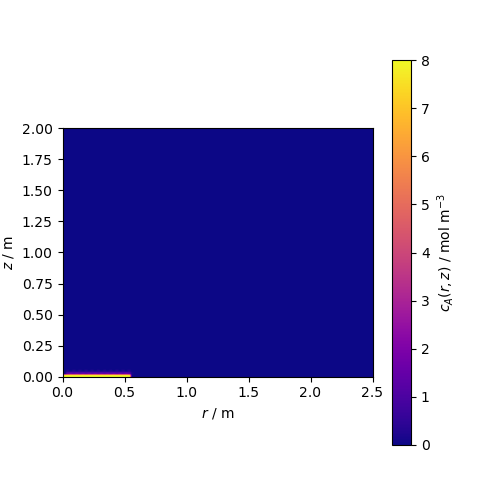

In [59]:
# Visualizamos la solución para la concentración de aromas en 2-D

fig = plt.subplots(figsize=[5,5])
plt.imshow(np.flipud(np.transpose(cA1)), origin="upper", extent =[0, Lr,0,Lz], cmap = "plasma")
plt.colorbar(label=r"$c_A(r,z)$ / mol m$^{-3}$")
plt.xlabel(r'$r$ / m')
plt.ylabel(r'$z$ / m')

plt.show()

#### Bibliografía:

1. [Successive over-relaxation method, Primer in Computational Mathematics, Earth Science and Engineering Department, Imperial College London](https://primer-computational-mathematics.github.io/book/c_mathematics/numerical_methods/6_Solving_PDEs_SOR.html)